In [1]:
import os

import matplotlib
import numpy as np
import pylab as pl
import pandas as pd
from scipy import optimize

In [ ]:
!pip install celerite

In [2]:
import corner
import radvel

from radvel.likelihood import RVLikelihood
from radvel.plot import orbit_plots, mcmc_plots

c:\users\rohan\appdata\local\programs\python\python36\lib\site-packages\radvel\gp.py:33: ImportWarning: celerite not installed. GP kernals using celerite will not work. Try installing celerite using 'pip install celerite'
  Try installing celerite using 'pip install celerite'", ImportWarning)


In [ ]:
df = pd.read_csv(os.path.join(os.getcwd(), "sim1.csv"))

time_base = np.mean([np.min(df["JD"]), np.max(df["JD"])])

time_base

In [5]:
def initialize_model():
    time_base = 249.5
    params = radvel.Parameters(2 ,basis='per tp e w k') # number of planets = 2
    params['per1'] = radvel.Parameter(value=452.8)
    params['tp1'] = radvel.Parameter(value=2451917)
    params['e1'] = radvel.Parameter(value=0.09)
    params['w1'] = radvel.Parameter(value=300)
    params['k1'] = radvel.Parameter(value=49.012702471070284)
    params['per2'] = radvel.Parameter(value=883)
    params['tp2'] = radvel.Parameter(value=2452441)
    params['e2'] = radvel.Parameter(value=0.29)
    params['w2'] = radvel.Parameter(value=300)
    params['k2'] = radvel.Parameter(value=17.6343)
    mod = radvel.RVModel(params, time_base=time_base)
    mod.params['dvdt'] = radvel.Parameter(value=-0.02)
    mod.params['curv'] = radvel.Parameter(value=0.01)
    return mod

In [25]:
def plot_results(like):
    fig = pl.figure(figsize=(12,4))
    fig = pl.gcf()
    fig.set_tight_layout(True)
    pl.errorbar(
        like.x, like.model(t)+like.residuals(), 
        yerr=like.yerr, fmt='o'
        )
    pl.plot(ti, like.model(ti))
    pl.xlabel('Time')
    pl.ylabel('RV')
    pl.draw()

In [31]:
path = os.path.join(os.getcwd(),'sim1.csv')
rv = pd.read_csv(path).drop(columns=["Unnamed: 0"])

t = np.array(rv.JD)
vel = np.array(rv.RV)
errvel = np.array(rv.RV_ERROR)
ti = np.linspace(rv.JD.iloc[0]-5,rv.JD.iloc[-1]+5,100)

In [32]:
rv.head()

,JD,RV,RV_ERROR
0,0.0,9.629592,1
1,1.0,-16.884411,1
2,2.0,18.014635,1
3,3.0,-25.923554,1
4,4.0,13.855441,1


In [40]:
mod = initialize_model()
like= RVLikelihood(mod, t, vel, errvel)
like.params['gamma'] = radvel.Parameter(value=0.1, vary=False, linear=True)
like.params['jit'] = radvel.Parameter(value=1.0)

In [42]:
like.params['e1'].vary = False
like.params['e2'].vary = False

like.params['per1'].vary = False
like.params['per2'].vary = False

like.params['tp1'].vary = False
like.params['tp2'].vary = False


<Figure size 432x288 with 0 Axes>

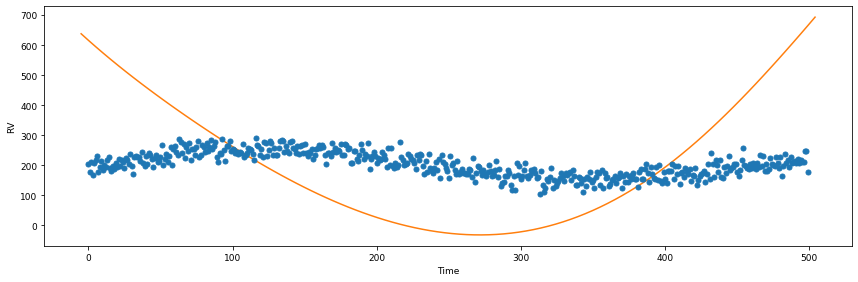

In [43]:
pl.figure()
plot_results(like)

In [44]:
post = radvel.posterior.Posterior(like)
post.priors += [radvel.prior.Gaussian( 'jit', np.log(3), 0.5)]
post.priors += [radvel.prior.Gaussian( 'k1', 5, 10)]
post.priors += [radvel.prior.Gaussian( 'k2', 5, 10)]
post.priors += [radvel.prior.Gaussian( 'gamma', 0, 10)]

In [1]:
res  = optimize.minimize(
    post.neglogprob_array,     # objective function is negative log likelihood
    post.get_vary_params(),    # initial variable parameters
    method='Nelder-Mead',           # Nelder-Mead also works
    )

plot_results(like)             # plot best fit model
print(post)

NameError: name 'optimize' is not defined

In [46]:
radvel.fitting.maxlike_fitting(post, "Nelder-Mead")

Initial loglikelihood = -4980.823213
Performing maximum a posteriori fit...
Final loglikelihood = -17279.623485
Best-fit parameters:
parameter                     value      vary
per1                          452.8      False
tp1                     2.45167e+06      False
e1                             0.09      False
w1                          300.712       True
k1                          -96.379       True
per2                            883      False
tp2                     2.45219e+06      False
e2                             0.29      False
w2                          305.129       True
k2                          241.893       True
dvdt                       0.130188       True
curv                      0.0151864       True
gamma                      -185.785      False
jit                         60.0041       True

Priors
------
Gaussian prior on jit, mu=1.0986122886681098, sigma=0.5
Gaussian prior on k1, mu=5, sigma=10
Gaussian prior on k2, mu=5, sigma=10
Gaussian prior on 

parameter                     value      vary
per1                          452.8      False
tp1                     2.45167e+06      False
e1                             0.09      False
w1                          300.712       True
k1                          -96.379       True
per2                            883      False
tp2                     2.45219e+06      False
e2                             0.29      False
w2                          305.129       True
k2                          241.893       True
dvdt                       0.130188       True
curv                      0.0151864       True
gamma                      -185.785      False
jit                         60.0041       True

Priors
------
Gaussian prior on jit, mu=1.0986122886681098, sigma=0.5
Gaussian prior on k1, mu=5, sigma=10
Gaussian prior on k2, mu=5, sigma=10
Gaussian prior on gamma, mu=0, sigma=10

In [52]:
d = radvel.mcmc(post,nwalkers=20,nrun=400)

AttributeError: module 'radvel' has no attribute 'likelihood'

In [49]:
like.params['e1'].vary = True
like.params['e2'].vary = True


parameter                     value      vary
per1                          452.8      False
tp1                     2.45167e+06      False
e1                        0.0912898       True
w1                          294.643       True
k1                         -97.3022       True
per2                            883      False
tp2                     2.45219e+06      False
e2                         0.293281       True
w2                          308.842       True
k2                          236.509       True
dvdt                        0.13148       True
curv                      0.0153231       True
gamma                      -406.548      False
jit                         60.2782       True

Priors
------
Gaussian prior on jit, mu=1.0986122886681098, sigma=0.5
Gaussian prior on k1, mu=5, sigma=10
Gaussian prior on k2, mu=5, sigma=10
Gaussian prior on gamma, mu=0, sigma=10



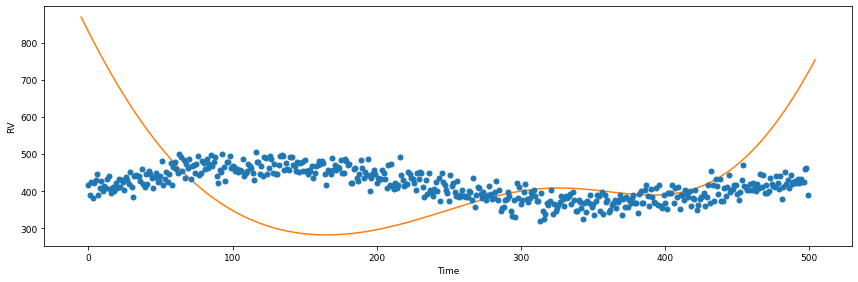

In [50]:

res  = optimize.minimize(
    post.neglogprob_array, 
    post.get_vary_params(), 
    method='Nelder-Mead')

plot_results(like)
print(post)



In [51]:
RVPlot = orbit_plots.MultipanelPlot(post)
RVPlot.plot_multipanel()

AttributeError: module 'radvel' has no attribute 'likelihood'